# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [80]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

In [81]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [82]:
test_images_orig.shape

(10000, 28, 28)

In [83]:
train_labels.shape

(60000,)

In [84]:
test_labels.shape

(10000,)

In [85]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

In [86]:
test_labels.min()

np.uint8(0)

In [87]:
set(test_labels)

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

In [88]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  2  95 95 2  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  30 78 18625425424575 0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  54 24220425425425425423146 0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  6  16116012320 61 24225488 0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  14625423221 0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  14625425473 0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  

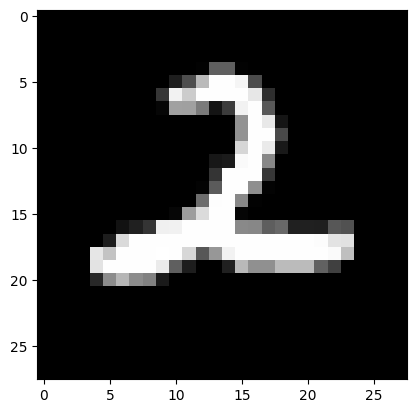

In [89]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
# print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
print('Label: ', train_labels[index])
plt.imshow(sample_image, cmap="gray")
plt.show()


**Sanity check 1:** Find the shape of the train and test data and lebels



In [90]:
#your code here

**Sanity Check 2:** Print the labels. How many unique label value do you see?

In [91]:
#your code here

### **Exercise 1:** Display the fourth image in the `test set` with its label.

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  55 14821025325311387 14855 0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  87 2322522531892102522522531680  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  4  57 24225219065 5  12 1822522531160  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  

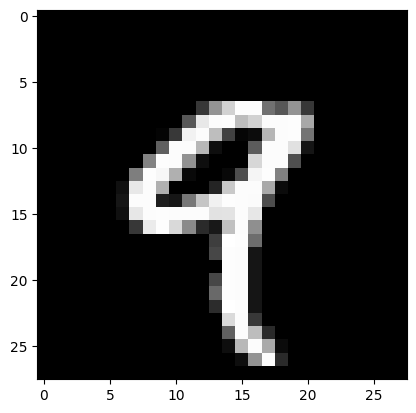

In [92]:
#your code here

# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[4]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
# print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
print('Label: ', train_labels[4])
plt.imshow(sample_image, cmap="gray")
plt.show()


# A first look at a neural network

## **Step 1:** The network architecture

In [93]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Input(shape=(784,)), #or shape=(28*28,)
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

In [94]:
train_images = train_images_orig.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### **Exercise 2:** What is the shape of data after preprocessing

In [95]:
#your code here
train_images.shape

(60000, 784)

### Tensor reshaping

In [96]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
a.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [97]:
#your code here
a.reshape(6,1)

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

In [98]:
#your code here
#your code here
def relu(x):
  return np.maximum(0, x)

x = np.linspace(-5, 5, 30)
y = relu(x)
y

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.17241379, 0.51724138, 0.86206897, 1.20689655, 1.55172414,
       1.89655172, 2.24137931, 2.5862069 , 2.93103448, 3.27586207,
       3.62068966, 3.96551724, 4.31034483, 4.65517241, 5.        ])

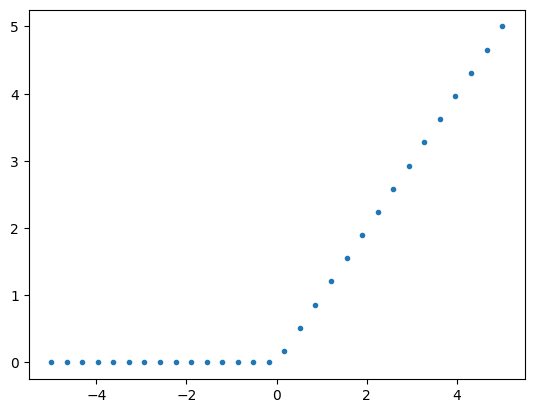

In [99]:
# my solution output
plt.plot(x, y, '.')

### **Ecercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)

your answer here: 0, 5, 0, 0, 6

### **Output layer** - `Sigmoid` and `Softmax` activation function

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

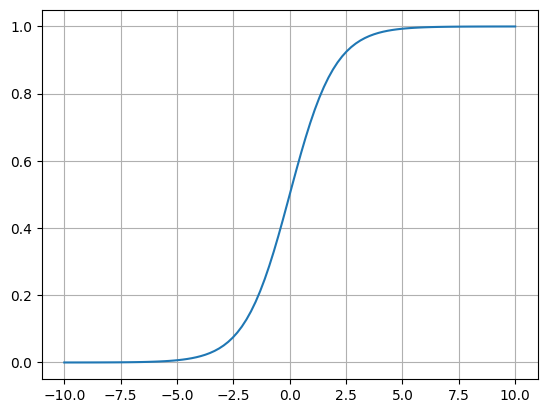

In [100]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Show bar plot of last layer values before applying any activation function (logits)
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

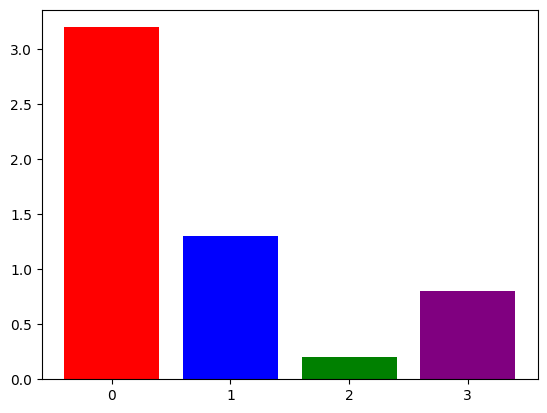

In [101]:
logits = np.array([3.2, 1.3, 0.2, 0.8])

plt.bar(np.arange(4), logits, color=['red', 'blue', 'green', 'purple'])
#you code here for plotting
plt.xticks(np.arange(4))
plt.show()

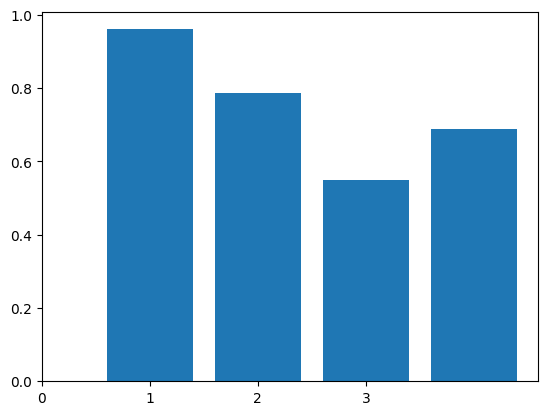

In [102]:
# we call value of the last layer before applying activation func as logits
logits = np.array([3.2, 1.3, 0.2, 0.8])
#your code here
logits_scaled = sigmoid(logits) #put your calculation instead of ...

# use plt.plot to show the bar chart of lo
plt.bar([1,2,3,4], logits_scaled)
#you code here for plotting
plt.xticks(np.arange(4))
plt.show()

In [103]:
#my solution output

This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [104]:
def softmax(x):
  """
  input x is a vector representing the output of the last layer of a neural network
  """
  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

In [105]:
#your code here
logits = np.array([3.2, 1.3, 0.2, 0.8])
probs = softmax(logits) # start your code form this line
probs

array([0.77514955, 0.11593805, 0.03859242, 0.07031998])

np.float64(1.0000000000000002)

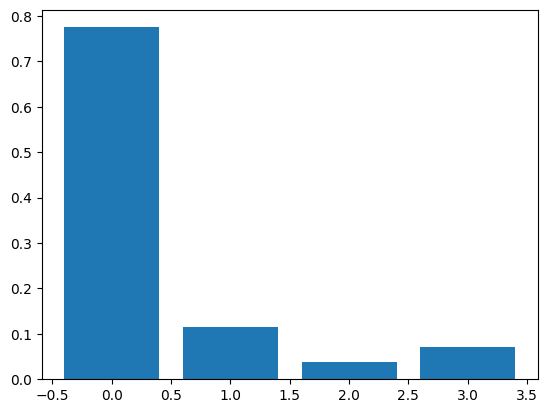

In [106]:
#my solution output
plt.bar(range(4), probs)
probs.sum()

### Exercise 8: Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [107]:
#your code here
predicted_class = np.argmax(probs)
predicted_class

np.int64(0)

> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels. By taking argmax from the probabilty distribtion you can get the predicted label**







## **Step 2:** The compilation step

In [108]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

Revisit the model:

```python
model = keras.Sequential([
    layers.Input(shape=(784,)), #or shape=(28*28,)
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
```




## **Step 3:** "Fitting" the model

In [109]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9228 - loss: 0.2681
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9680 - loss: 0.1090
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9790 - loss: 0.0718
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0510
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0391


## **Step 4:** Using the model to make predictions

In [110]:
test_digits = test_images[:5] #predictiong the label of test_image[0] , test_image[1], test_image[2]
print("input shape:", test_digits.shape)

predictions = model.predict(test_digits)
print("output shape: ", predictions.shape)
predictions


input shape: (5, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
output shape:  (5, 10)


array([[6.05026642e-08, 1.34087905e-08, 5.75072454e-06, 8.12019643e-05,
        6.80872676e-12, 3.41211752e-08, 8.56657952e-13, 9.99912500e-01,
        3.32011929e-08, 4.37515183e-07],
       [1.34091360e-08, 3.91653248e-06, 9.99984026e-01, 4.62268781e-06,
        1.27029423e-13, 1.68824045e-07, 2.15077911e-08, 1.12566965e-13,
        7.23673338e-06, 4.10289153e-13],
       [5.60470085e-07, 9.99196708e-01, 3.23967048e-04, 8.09999710e-06,
        2.56358799e-05, 2.59743706e-06, 3.80448955e-06, 1.24918995e-04,
        3.12505930e-04, 1.21954395e-06],
       [9.99811590e-01, 1.44146014e-07, 5.02815346e-05, 1.84249643e-06,
        3.35914933e-07, 2.48190986e-06, 8.31561701e-05, 4.33796777e-05,
        5.44854428e-09, 6.73588329e-06],
       [3.73499847e-06, 2.06542765e-08, 1.18110086e-06, 8.19674817e-09,
        9.98257697e-01, 1.92285992e-08, 4.50930838e-06, 9.35379794e-05,
        1.04008757e-06, 1.63818547e-03]], dtype=float32)

### **Exercise 9:** Interpret the values in the `prediction`array.  

your answer here:

### See the result for the prediction of the first image

In [111]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

[6.05026642e-08 1.34087905e-08 5.75072454e-06 8.12019643e-05
 6.80872676e-12 3.41211752e-08 8.56657952e-13 9.99912500e-01
 3.32011929e-08 4.37515183e-07]
Predicted label:  7


In [112]:
print("highest prob: ", predictions[0][7])

highest prob:  0.9999125


In [113]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


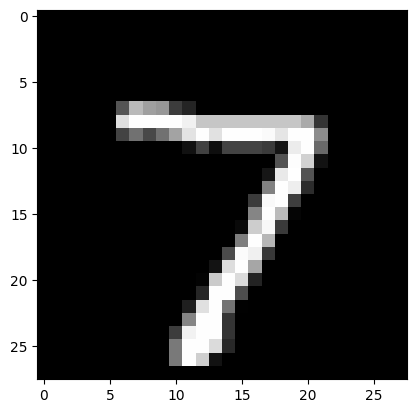

In [114]:
plt.imshow(test_images_orig[0], cmap='gray')

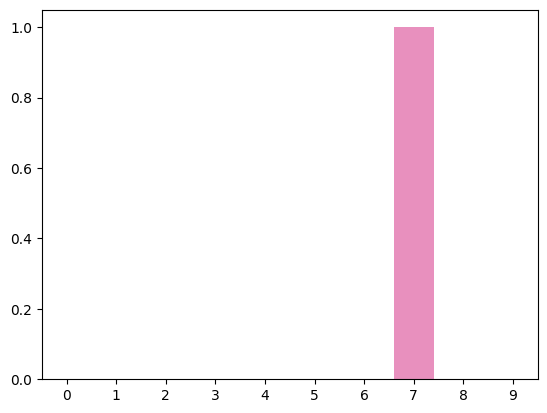

In [115]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

In [116]:
#your code here
print(predictions[4])
predicted_label = np.argmax(predictions[4])
print("Predicted label: ", predicted_label)

[3.7349985e-06 2.0654277e-08 1.1811009e-06 8.1967482e-09 9.9825770e-01
 1.9228599e-08 4.5093084e-06 9.3537979e-05 1.0400876e-06 1.6381855e-03]
Predicted label:  4


## **Step 5:** Evaluating the model on new data

In [117]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9807 - loss: 0.0632
test_acc: 0.9807000160217285


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.